In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

## Plots describing deposition locations of publications

In [15]:
# Import csv of review data
df = pd.read_csv("FAIRly_Depositing_Segmentations.csv")
df.head()

,PublicationTitle,DatabaseIDs,PublicationDate,PublicationDOI,StudyType,SegmentationUse,SourceData,TrainingData,LabelData,Code,Modality,FileFormatsSource,FileFormatsTraining,FileFormatsLabel,DataOrigin,SegmentationType,SegmentationMethod,BiologicalScale,Notes
0,A novel framework for segmentation of secretor...,NaN,2014,10.1016/j.media.2013.12.008,Software,Proof-of-concept,No,NaN,No,No,TEM,NaN,NaN,NaN,this study,Semantic,Automated,Subcellular,NaN
1,Cryo-FIB-SEM serial milling and block face ima...,NaN,2016,10.1016/j.jsb.2016.09.016,Method,Qualitative visualisation,No,NaN,No,No,Cryo-FIB-SEM,NaN,NaN,NaN,this study,Semantic,Automated,Subcellular,NaN
2,Convolutional neural networks for automated an...,"EMD-8594, EMD-8589, EMD-8590, EMD-8591, EMD-85...",2017,10.1038/nmeth.4405,Software,STA,No,NaN,EMDB,Github,Cryo-ET,NaN,NaN,map,"this study, public data",Instance,Automated,Subcellular,Code integrated into existing software EMAN2
3,Extracellular space preservation aids the conn...,NaN,2015,10.7554/eLife.08206,Method,Proof-of-concept,Dryad,No,No,No,SBF SEM,zipped,NaN,NaN,this study,Instance,Automated,Tissue (connectomics),NaN
4,Domain adaptation for microscopy imaging,NaN,2015,10.1109/TMI.2014.2376872,Software,Proof-of-concept,Some (DIADEM),Some (DIADEM),No,Institutional - working,3D EM,tiff,swc,NaN,this study,Semantic,Automated,Subcellular,Need to find code from reference to another pa...


In [ ]:
# Boilerplate

def count_each_category(df_series, lookup_dict):
    """Counts records within a specific category defined by lookup dict
    e.g., if we want to count all records with public challenges as the data source,
    then lookup_dict should list all the data sources which count as public challenges.

    Args:
        df_series (pd.Series): records to look through, e.g., df[TrainingData]
        lookup_dict (_type_): _description_

    Returns:
        _type_: _description_
    """
    category_counts = {}
    for category in set(lookup_dict.values()):
        category_counts[category] = 0
    for i in df_series:
        if pd.isna(i):
            pass
        else:
            for value, category in lookup_dict.items():
                if value.lower() in i.lower():
                    category_counts[category] += 1
    return category_counts

def subplot_bar(data, ax, colour, y):
    sns.barplot(data=data, x="Percentage", y=y, hue=y, ax=ax, palette=colour, legend=False)
    labels = []
    for i in range(len(data)):
        if data.iloc[i].Count > 0:
            labels.append(f"{data.iloc[i].Percentage:.1f}%, {data.iloc[i].Count:.0f}")
        else:
            labels.append("")
    for i, label in enumerate(labels):
        ax.text(2, i, label)


def plot_dep_locations(deposition_category_counts_df, title=None):

    sns.set_style("whitegrid")
    fig, axs = plt.subplots(3, 4, sharex=True, height_ratios=[2,3,7], figsize=(8,11), subplot_kw={"xticklabels": ""})

    colours = ["light:red_r", "light:orange_r", "light:mediumseagreen_r"]
    for i, datatype in enumerate(["SourceData", "TrainingData", "LabelData", "Code"]):
        for category in deposition_category_counts_df.DepositionFA:
            data = deposition_category_counts_df[(deposition_category_counts_df.DataType == datatype) & (deposition_category_counts_df.DepositionFA == category)]
            subplot_bar(data, axs[category, i], colours[category], y="RepositoryType")

    titles = ["Not findable or accessible\n", "Not findable", "Findable and accessible"]
    datatypes = ["Source Data", "Training Data", "Label Data", "Code"]
    for i in range(3):
        for j in range(4):
            axs[i,j].set_xlabel("")
            axs[i,j].set_ylabel("")
            if j > 0:
                axs[i,j].set_yticklabels("")
                axs[i,j].set_title("")
                axs[0,j].set_title(datatypes[j])
            axs[i,0].set_title(titles[i], position=(-1.3,0), ha="left", fontweight="bold", linespacing=3, fontsize="x-large")
    fig.text(0.275,0.928,"Source Data", fontsize="large")
    # plt.suptitle(title)

    plt.tight_layout()
    plt.savefig(f"./figs/{title}_deplocations.svg", transparent=True, dpi=200)


In [17]:
# Categories of deposition location

source_data_dep = {
    'BossDB': 'General scientific database',
    'CREMI': 'Public challenge',
    'Dryad': 'General scientific database',
    'EMDB': 'Field-specific database',
    'Kaggle': 'Public challenge',
    'EMPIAR': 'Field-specific database',
    'Bioimage Archive': 'Field-specific database',
    'Institutional - working': 'Self-maintained website',
    'GigaScience': 'General scientific database',
    'Github': 'Self-maintained website',
    'Google Drive, MEGA, Baidu Cloud': 'Commercial cloud',
    'Institutional - defunct': 'Not available anymore',
    'Mendeley': 'General scientific database',
    'MorphoSource': 'Field-specific database',
    'Neurodata': 'Field-specific database',
    'No': 'Not deposited',
    'Not anymore': 'Not available anymore',
    'Open Science Foundation': 'General scientific database',
    'ScanAllFish': 'Field-specific database',
    'White Matter Microscopy Database': 'Field-specific database',
    'OpenOrganelle': 'Field-specific database',
    'Own website - defunct': 'Not available anymore',
    'References other paper': 'References other paper',
    'Requires separate search (Cell-centred database)': 'Requires separate search',
    'Cell-centred database': 'Field-specific database',
    'Requires separate search': 'Requires separate search',
    'ISBI2012': 'Public challenge',
    'SNEMI3D': 'Public challenge',
    'SHREC': 'Public challenge',
    'SPARC': 'Field-specific database',
    'Cell Image Library': 'Field-specific database',
    'DIADEM': 'Public challenge',
    'Zenodo': 'General scientific database',
}

training_data_dep = {
    'CREMI': 'Public challenge',
    'EMPIAR': 'Field-specific database',
    'Github': 'Self-maintained website',
    'Google Drive, MEGA, Baidu Cloud': 'Commercial cloud',
    'Institutional - defunct': 'Not available anymore',
    'Institutional - working': 'Self-maintained website',
    'Neurodata': 'Field-specific database',
    'No': 'Not deposited',
    'OpenOrganelle': 'Field-specific database',
    'Requires separate search': 'Requires separate search',
    'ISBI2012': 'Public challenge',
    'SNEMI3D': 'Public challenge',
    'SHREC': 'Public challenge',
    'SPARC': 'Field-specific database',
    'DIADEM': 'Public challenge',
    'Zenodo': 'General scientific database',
}

label_data_dep = {
    'BossDB': 'General scientific database',
    'CZII Cryo ET Data Portal': 'Field-specific database',
    'DIY': 'DIY',
    'Dryad': 'General scientific database',
    'EMDB': 'Field-specific database',
    'EMPIAR': 'Field-specific database',
    'GigaScience': 'General scientific database',
    'Github': 'Self-maintained website',
    'Institutional - defunct': 'Not available anymore',
    'Institutional - working': 'Self-maintained website',
    'Mendeley': 'General scientific database',
    'Mobie': 'Field-specific database',
    'Neurodata': 'Field-specific database',
    'No': 'Not deposited',
    'Open Science Foundation': 'General scientific database',
    'ScanAllFish': 'Field-specific database',
    'OpenOrganelle': 'Field-specific database',
    'Requires separate search': 'Requires separate search',
    'ISBI2012': 'Public challenge',
    'SNEMI3D': 'Public challenge',
    'SPARC': 'Field-specific database',
    'Supplementary Info': 'Supplementary Info',
    'Zenodo': 'General scientific database',
}

code_dep = {
    'Github': 'Self-maintained website',
    'Zenodo': 'General scientific database',
    'Gitlab': 'Self-maintained website',
    'ImageJ plugin': 'In other software',
    'Institutional - defunct': 'Not available anymore',
    'Institutional - working': 'Self-maintained website',
    'Maybe, references another paper for method': 'References other paper',
    'Mendeley': 'General scientific database',
    'Might be part of Ilastik, but unsure.': 'In other software',
    'No': 'Not deposited',
    'Not anymore (ImageJ website)': 'Not available anymore',
    'Supplementary Info': 'Supplementary Info',
    'Website - working': 'Self-maintained website',
}

In [18]:
# Sort data deposition locations into categories and count

deposition_category_counts_df = pd.DataFrame.from_dict({
    "SourceData": count_each_category(df.SourceData, source_data_dep),
    "TrainingData": count_each_category(df.TrainingData, training_data_dep),
    "LabelData": count_each_category(df.LabelData, label_data_dep),
    "Code": count_each_category(df.Code, code_dep)
})

deposition_category_counts_df["RepositoryType"] = deposition_category_counts_df.index

deposition_category_counts_df = deposition_category_counts_df.melt(
    id_vars="RepositoryType",
    value_vars=["SourceData", "TrainingData", "LabelData", "Code"],
    var_name="DataType",
    value_name="Count"
)

deposition_category_counts_df.head()

,RepositoryType,DataType,Count
0,Field-specific database,SourceData,55.0
1,Not available anymore,SourceData,4.0
2,Public challenge,SourceData,20.0
3,References other paper,SourceData,3.0
4,Commercial cloud,SourceData,1.0


In [19]:
# Add percentages

# datatype_total_counts = number of non N/A publications for each data type
# need to count separately as deposition_category_counts_df has duplicates for where data is sourced from multiple locations
datatype_total_counts = {
    "SourceData": df.SourceData.count().sum(),
    "TrainingData": df.TrainingData.count().sum(),
    "LabelData": df.LabelData.count().sum(),
    "Code": df.Code.count().sum(),
}
pct = []
for i in range(len(deposition_category_counts_df)):
    pct.append(100 * deposition_category_counts_df.iloc[i].Count / datatype_total_counts[deposition_category_counts_df.iloc[i].DataType])

deposition_category_counts_df["Percentage"] = pct
deposition_category_counts_df.head()

,RepositoryType,DataType,Count,Percentage
0,Field-specific database,SourceData,55.0,24.229075
1,Not available anymore,SourceData,4.0,1.762115
2,Public challenge,SourceData,20.0,8.810573
3,References other paper,SourceData,3.0,1.321586
4,Commercial cloud,SourceData,1.0,0.440529


In [20]:
# Categorise according to the following categories of deposition locations:
# 0 - not findable or accessible
# 1 - not findable
# 2 - findable and accessible

deposition_FA = []
for i in range(len(deposition_category_counts_df)):
    if deposition_category_counts_df.iloc[i].RepositoryType in ["Not deposited", "Not available anymore", "Not available yet"]:
        deposition_FA.append(0)  # not findable or accessible
    elif deposition_category_counts_df.iloc[i].RepositoryType in ["Requires separate search", "References other paper", "Commercial cloud"]:
        deposition_FA.append(1)  # not findable
    else:
        deposition_FA.append(2)  # everything else

deposition_category_counts_df["DepositionFA"] = deposition_FA

deposition_category_counts_df.head()

,RepositoryType,DataType,Count,Percentage,DepositionFA
0,Field-specific database,SourceData,55.0,24.229075,2
1,Not available anymore,SourceData,4.0,1.762115,0
2,Public challenge,SourceData,20.0,8.810573,2
3,References other paper,SourceData,3.0,1.321586,1
4,Commercial cloud,SourceData,1.0,0.440529,1


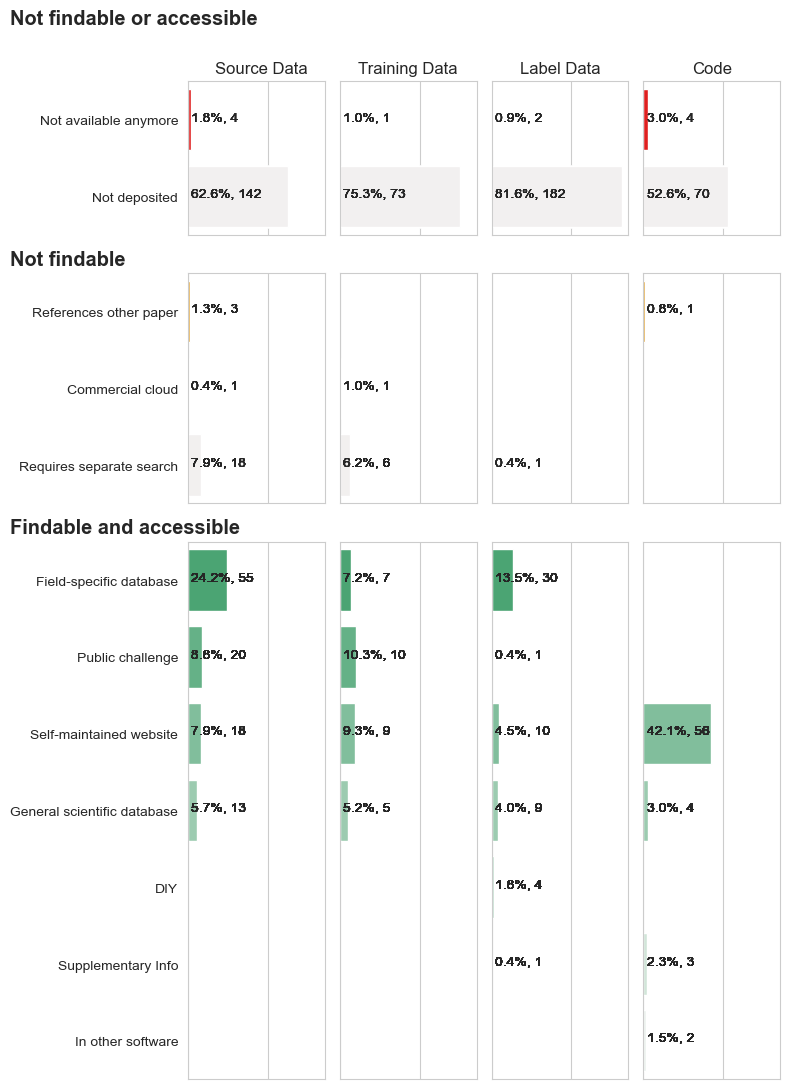

In [21]:
# Plot for all data

plot_dep_locations(deposition_category_counts_df, "all")